<a href="https://colab.research.google.com/github/Ananya2003Gupta/103e4d5d-338a-450d-bf0c-8a8c6901b1f8/blob/main/AQI_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

In [1]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [3]:
#Uploading dataset from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AQI Data.csv to AQI Data.csv
User uploaded file "AQI Data.csv" with length 8600 bytes


In [4]:
#Loading the dataset
df = pd.read_csv('AQI Data.csv')

In [5]:
#Printing the dataframe

print(df)

     Location    Date   AQI
0    Adilabad  Jan-16 67.00
1    Adilabad  Feb-16 68.00
2    Adilabad  Mar-16 71.00
3    Adilabad  Apr-16 70.00
4    Adilabad  May-16 71.00
..        ...     ...   ...
415  Warangal  Aug-22 56.00
416  Warangal  Sep-22 48.00
417  Warangal  Oct-22 64.00
418  Warangal  Nov-22 94.00
419  Warangal  Dec-22 94.00

[420 rows x 3 columns]


In [6]:
#Display all the column/attribute names

df.columns

Index(['Location', 'Date', 'AQI'], dtype='object')

In [7]:
#Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  420 non-null    object 
 1   Date      420 non-null    object 
 2   AQI       408 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.0+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
print(df)
#df = df.set_index('Date')

     Location       Date   AQI
0    Adilabad 2016-01-01 67.00
1    Adilabad 2016-02-01 68.00
2    Adilabad 2016-03-01 71.00
3    Adilabad 2016-04-01 70.00
4    Adilabad 2016-05-01 71.00
..        ...        ...   ...
415  Warangal 2022-08-01 56.00
416  Warangal 2022-09-01 48.00
417  Warangal 2022-10-01 64.00
418  Warangal 2022-11-01 94.00
419  Warangal 2022-12-01 94.00

[420 rows x 3 columns]


In [9]:
df.describe()

,AQI
count,408.00
mean,71.56
std,17.34
min,31.00
25%,60.00
50%,69.00
75%,83.25
max,137.00


In [10]:
#Display the datatypes of all the columns/attributes of dataframe

df.dtypes

Location            object
Date        datetime64[ns]
AQI                float64
dtype: object

In [11]:
#Display the first five rows of the dataframe

print(df.head())

   Location       Date   AQI
0  Adilabad 2016-01-01 67.00
1  Adilabad 2016-02-01 68.00
2  Adilabad 2016-03-01 71.00
3  Adilabad 2016-04-01 70.00
4  Adilabad 2016-05-01 71.00


In [12]:
# Display the last five rows of the dataframe

print(df.tail())

     Location       Date   AQI
415  Warangal 2022-08-01 56.00
416  Warangal 2022-09-01 48.00
417  Warangal 2022-10-01 64.00
418  Warangal 2022-11-01 94.00
419  Warangal 2022-12-01 94.00


In [13]:
#Sort the dataframe in ascending order based on Location values

df.sort_values('Location')

,Location,Date,AQI
0,Adilabad,2016-01-01,67.00
60,Adilabad,2021-01-01,NaN
59,Adilabad,2020-12-01,NaN
58,Adilabad,2020-11-01,NaN
57,Adilabad,2020-10-01,72.00
...,...,...,...
359,Warangal,2017-12-01,78.00
358,Warangal,2017-11-01,76.00
357,Warangal,2017-10-01,62.00
365,Warangal,2018-06-01,84.00


In [14]:
#Dispaly the sum of the null values in each column/attribute

df.isnull().sum()

Location     0
Date         0
AQI         12
dtype: int64

In [15]:
df_Ad = df[df['Location'].isin(['Adilabad'])]
df_Ka = df[df['Location'].isin(['Karimnagar'])]
df_Kh = df[df['Location'].isin(['Khammam'])]
df_Ni = df[df['Location'].isin(['Nizamabad'])]
df_W = df[df['Location'].isin(['Warangal'])]

<AxesSubplot:xlabel='Date'>

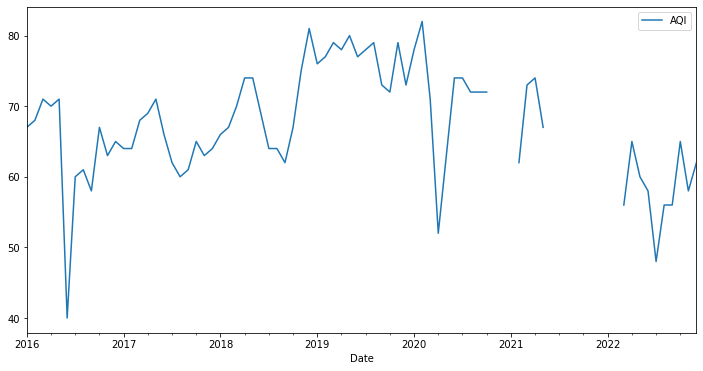

In [16]:
# Adilabad

df_Ad.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

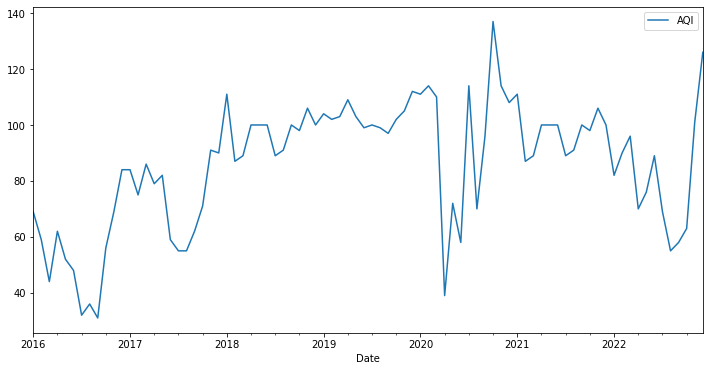

In [17]:
# Karimnagar

df_Ka.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

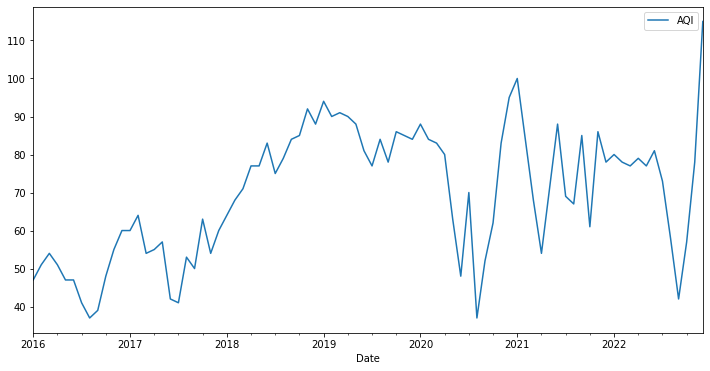

In [18]:
# Khamman

df_Kh.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

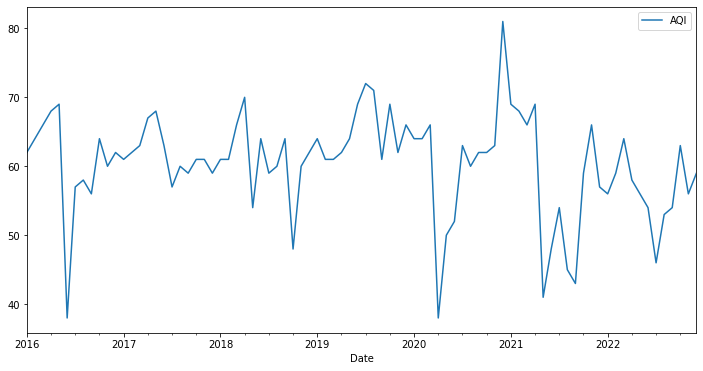

In [19]:
#Nizamabad

df_Ni.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

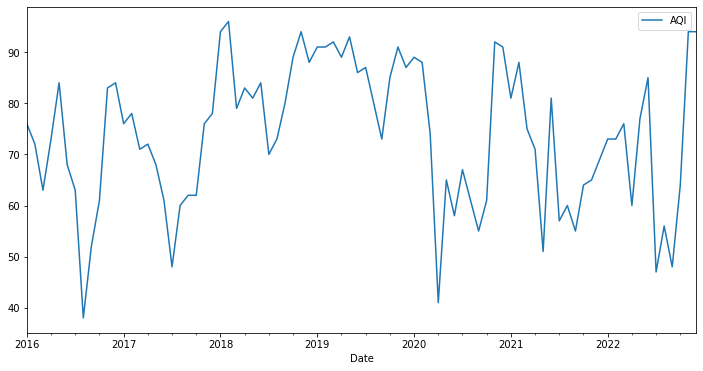

In [20]:
# Warangal

df_W.plot(x='Date', y='AQI', figsize=(12,6))

# Comparison of Models for prediction of AQI

In [21]:
from darts import TimeSeries
from darts.models import ARIMA, AutoARIMA, ExponentialSmoothing, FFT, Theta, StatsForecastETS, StatsForecastAutoARIMA, Prophet, NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score, rmse, mae

filler = MissingValuesFiller()
scaler = Scaler()

In [22]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [23]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

# Karimnagar

In [24]:
df_Ka.describe()

,AQI
count,84.00
mean,86.02
std,22.59
min,31.00
25%,69.75
50%,90.50
75%,100.25
max,137.00


<AxesSubplot:xlabel='Date'>

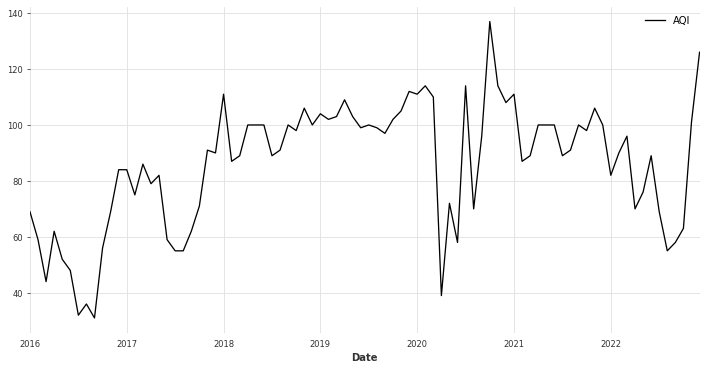

In [25]:
df_Ka.plot(x='Date', y='AQI', figsize=(12,6))

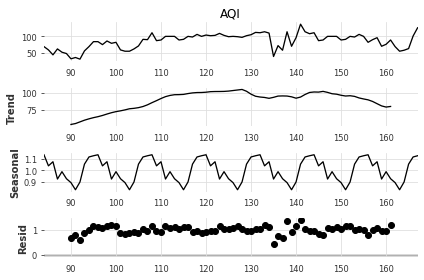

In [26]:
dec = sm.tsa.seasonal_decompose(df_Ka['AQI'],period = 12, model = 'multiplicative').plot()

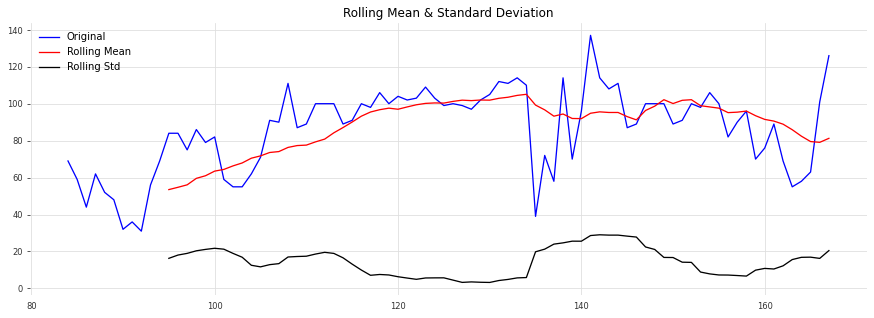

Results of Dickey-Fuller Test:
Test Statistic                -3.54
p-value                        0.01
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [27]:
test_stationarity(df_Ka['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


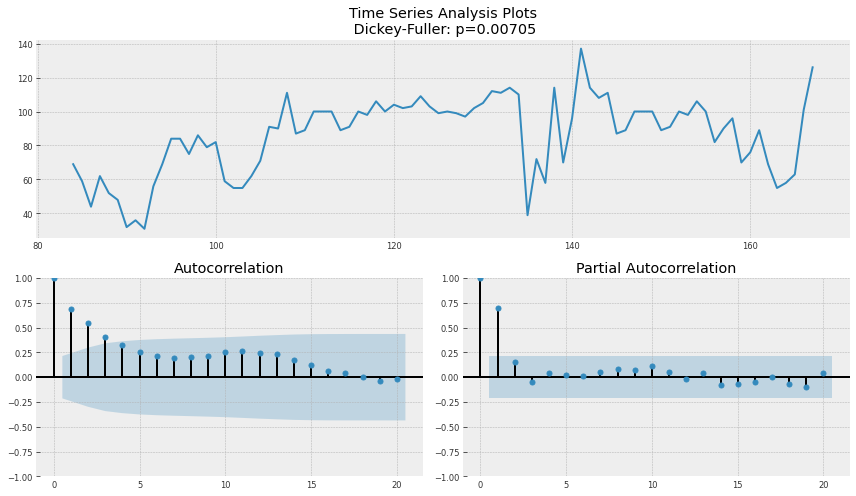

In [28]:
tsplot(df_Ka['AQI'])

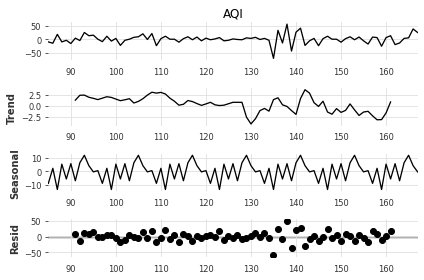

In [29]:
data_diff = df_Ka['AQI'].diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

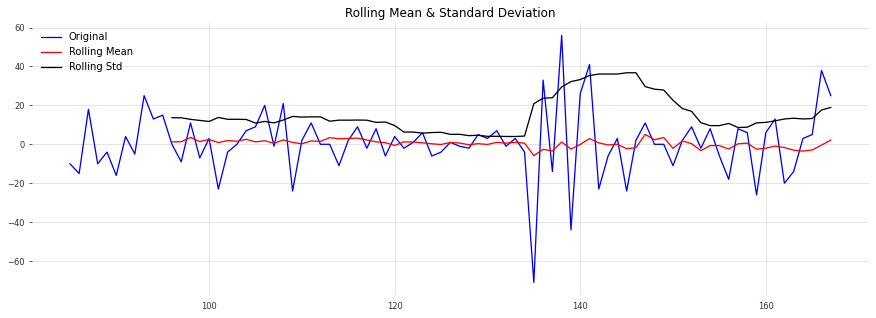

Results of Dickey-Fuller Test:
Test Statistic                -11.70
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used    82.00
Critical Value (1%)            -3.51
Critical Value (5%)            -2.90
Critical Value (10%)           -2.59
dtype: float64


In [30]:
test_stationarity(data_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


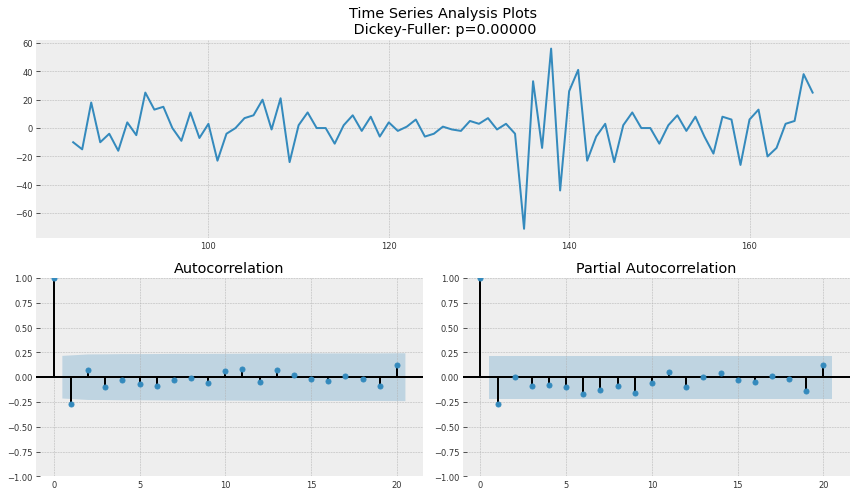

In [31]:
tsplot(data_diff)

In [32]:
series = TimeSeries.from_dataframe(df_Ka, 'Date',['AQI'])

In [33]:
train_Ka, test_Ka = series.split_after(pd.Timestamp('20211201'))
test = test_Ka

In [34]:
scaler.fit(train_Ka)
scaled_train = scaler.transform(train_Ka)
scaled_test = scaler.transform(test_Ka)

## ARIMA

In [35]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

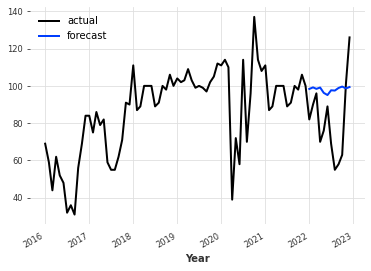

In [36]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [37]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

21.753690546159714
31.55236227829135
-0.735158564004532
25.830304237397062


## AutoARIMA

In [38]:
model = AutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

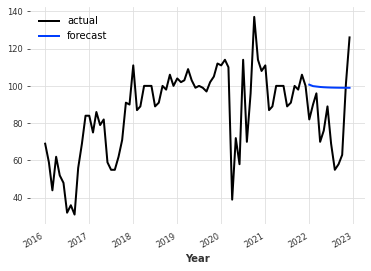

In [39]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [40]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

22.94025469392122
33.05575095454263
-0.8487308000441551
26.662248739406408


## Exponential Smoothening

In [41]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

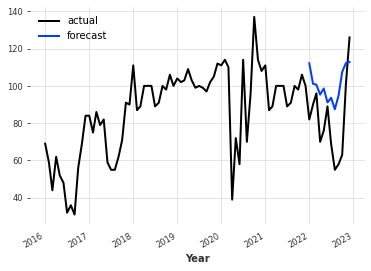

In [42]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [43]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

21.56343301811062
31.04915106092106
-0.6257045533032708
25.002345281792426


## FFT

In [44]:
model = FFT()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

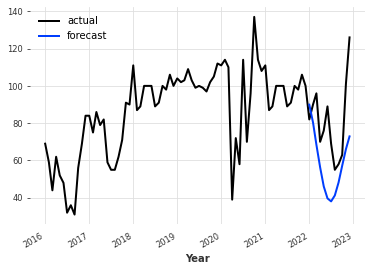

In [45]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [46]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

23.859167221698613
28.000993611105656
-1.111190982092857
28.492050044883815


## Stats Forecast AutoARIMA

In [48]:
model = StatsForecastAutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

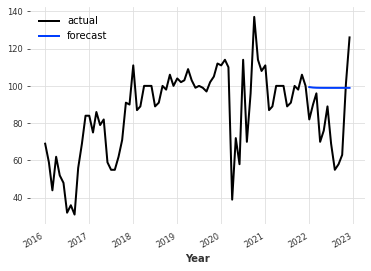

In [49]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [50]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

22.597264028797312
32.62753199771849
-0.817552205954476
26.436465135498985


## Stats Forecast ETS

In [52]:
model = StatsForecastETS()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

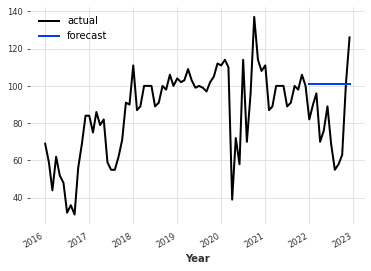

In [53]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [54]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

23.95904421264231
34.6906213766089
-1.0196424945656588
27.867447228725478


## Prophet

In [55]:
model = Prophet()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/q_0_4jrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/a6vz9xai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97604', 'data', 'file=/tmp/tmp9y_s2b67/q_0_4jrv.json', 'init=/tmp/tmp9y_s2b67/a6vz9xai.json', 'output', 'file=/tmp/tmp9y_s2b67/prophet_model8idqdx1b/prophet_model-20230303054038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

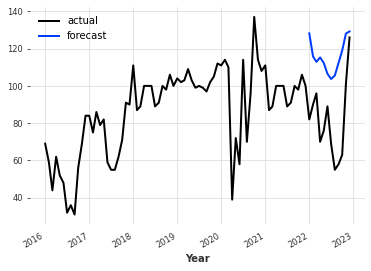

In [56]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [57]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

34.47689801279935
49.05713821627391
-2.7581403632815547
38.01425080509492


## NBEATSModel

In [58]:
model = NBEATSModel(
    input_chunk_length = 4,
    output_chunk_length =1,
    generic_architecture = True,
    num_stacks = 4,
    num_blocks = 10,
    num_layers = 4,
    n_epochs = 10,
    batch_size = 4,
    model_name='nbeats_run',
)
model.fit(scaled_train, val_series = scaled_test, verbose=True)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.8/dist-packages/lightning_fabric/accelerators/cuda.py:236: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
--------------------------------------------------

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

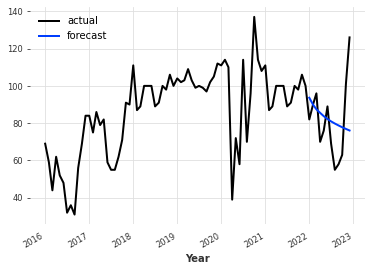

In [59]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [60]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

16.386238328701907
20.6975226250175
-0.09133798349972855
20.485170022814923


# Khamman

In [61]:
df_Kh.describe()

,AQI
count,84.00
mean,69.67
std,17.08
min,37.00
25%,54.75
50%,72.00
75%,84.00
max,115.00


<AxesSubplot:xlabel='Date'>

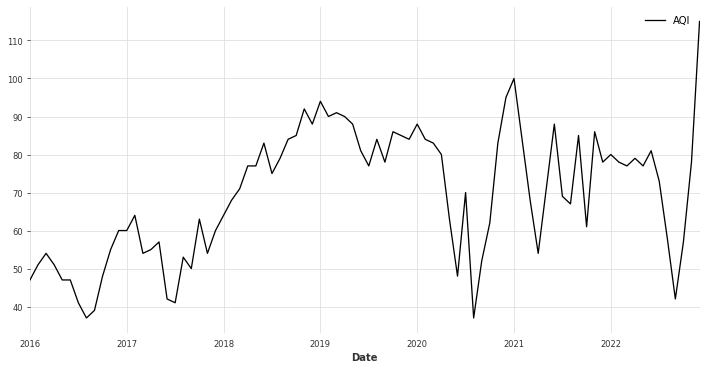

In [62]:
df_Kh.plot(x='Date', y='AQI', figsize=(12,6))

<Figure size 1728x576 with 0 Axes>

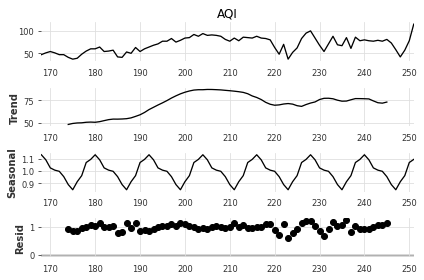

<Figure size 1728x576 with 0 Axes>

In [63]:
dec = sm.tsa.seasonal_decompose(df_Kh['AQI'],period = 12, model = 'multiplicative').plot()
plt.figure(figsize = (24,8))

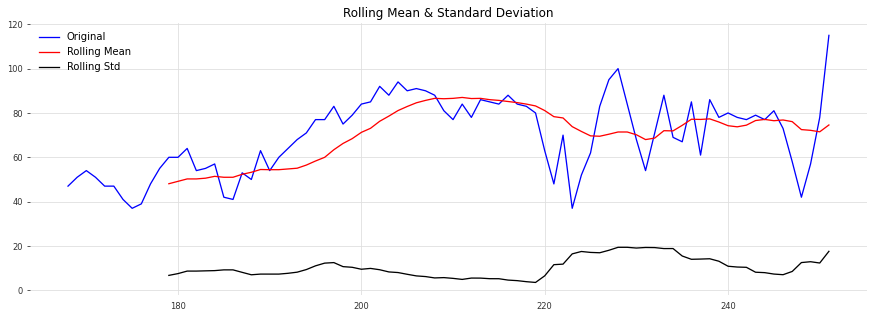

Results of Dickey-Fuller Test:
Test Statistic                -2.75
p-value                        0.07
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [64]:
test_stationarity(df_Kh['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


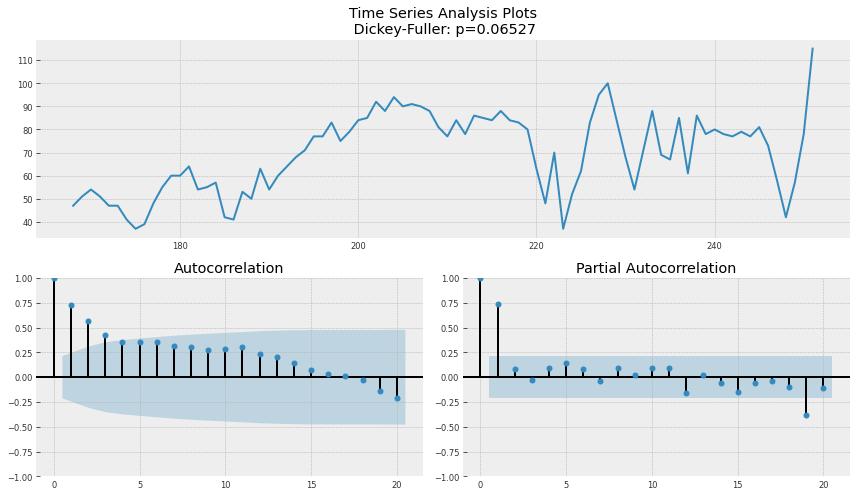

In [65]:
tsplot(df_Kh['AQI'])

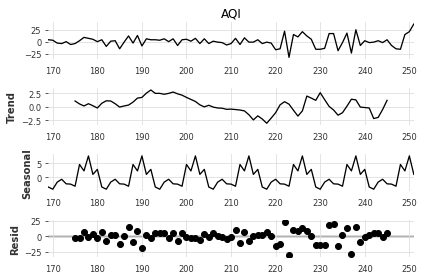

In [66]:
data_diff = df_Kh['AQI'].diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

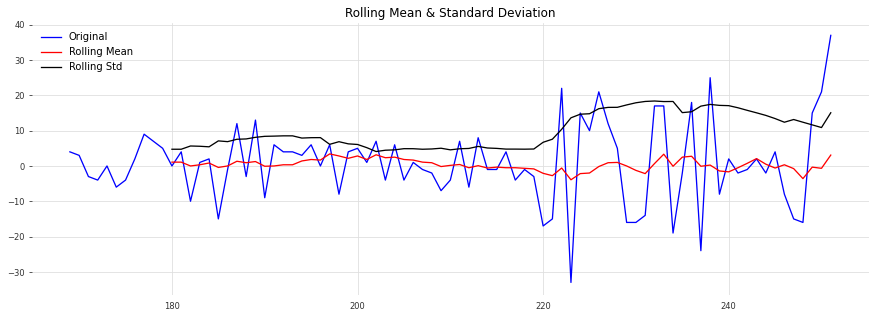

Results of Dickey-Fuller Test:
Test Statistic                -5.57
p-value                        0.00
#Lags Used                     4.00
Number of Observations Used   78.00
Critical Value (1%)           -3.52
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [67]:
test_stationarity(data_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


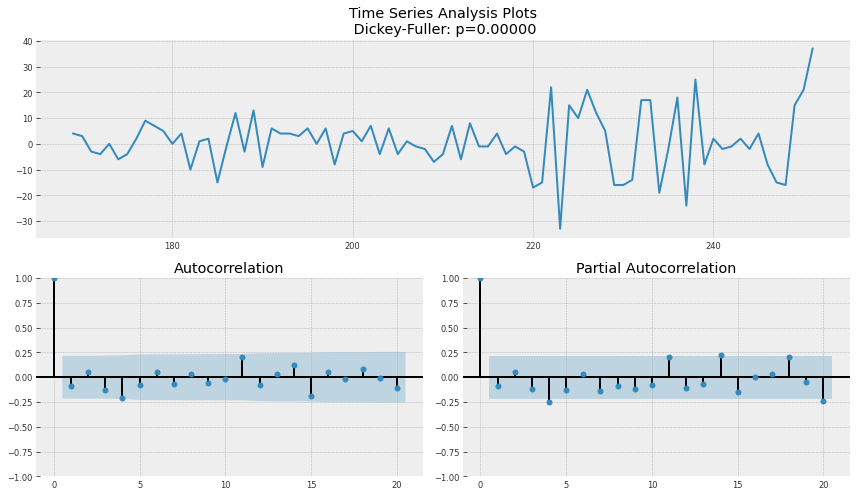

In [68]:
tsplot(data_diff)

In [69]:
series = TimeSeries.from_dataframe(df_Kh, 'Date',['AQI'])

In [70]:
train_Kh, test_Kh = series.split_after(pd.Timestamp('20211201'))
test = test_Kh

In [71]:
scaler.fit(train_Kh)
scaled_train = scaler.transform(train_Kh)
scaled_test = scaler.transform(test_Kh)

## ARIMA

In [72]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

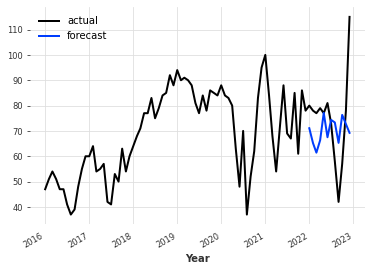

In [73]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [74]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

14.500709824296303
20.41316428763531
-0.2048814169561075
18.495338558640285


## AutoARIMA

In [75]:
model = AutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

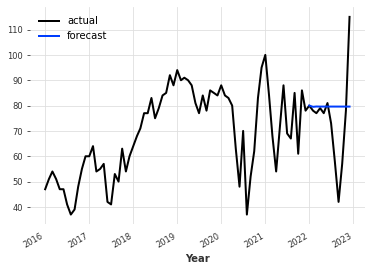

In [76]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [77]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

11.184338574769024
18.30209844442908
-0.08893074919142241
17.582890164082045


## Exponential Smoothening

In [78]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

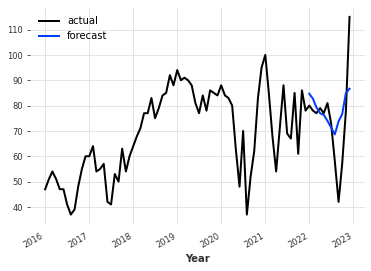

In [79]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [80]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.038584307192911
15.947950077395626
0.27528932413593465
14.344072178988982


## FFT

In [81]:
model = FFT()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

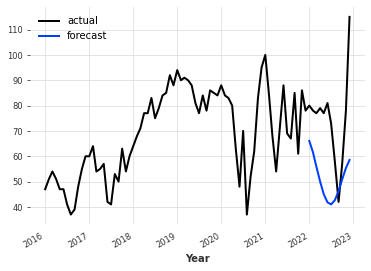

In [82]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [83]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

24.04191167460864
30.154943844315678
-1.7366863403881547
27.874214943365686


## Stats Forecast AutoARIMA

In [84]:
model = StatsForecastAutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

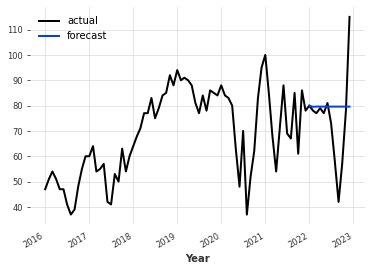

In [85]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [86]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

11.176270416157541
18.28923554588805
-0.08850809263377402
17.579477529673508


## Stats Forecast ETS

In [87]:
model = StatsForecastETS()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

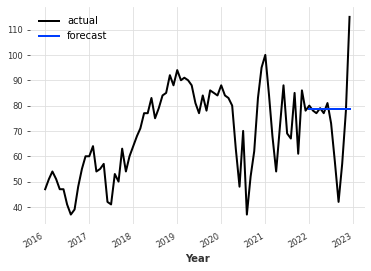

In [88]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [89]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.828143196675697
17.65303977391373
-0.06069394171309628
17.35342393749888


## Prophet

In [90]:
model = Prophet()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/qie4i9u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/tvo585e0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34426', 'data', 'file=/tmp/tmp9y_s2b67/qie4i9u0.json', 'init=/tmp/tmp9y_s2b67/tvo585e0.json', 'output', 'file=/tmp/tmp9y_s2b67/prophet_model1o0hzi7i/prophet_model-20230303054407.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

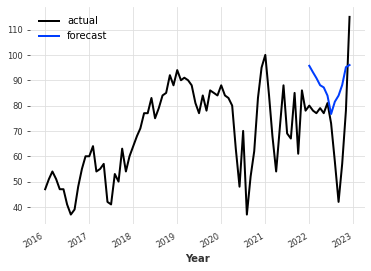

In [91]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [92]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

16.938716415697282
26.990975748462837
-0.4122668619309384
20.023893039927632


## NBEATSModel

In [93]:
model = NBEATSModel(
    input_chunk_length = 4,
    output_chunk_length =1,
    generic_architecture = True,
    num_stacks = 4,
    num_blocks = 10,
    num_layers = 4,
    n_epochs = 10,
    batch_size = 4,
    model_name='nbeats_run',
)
model.fit(scaled_train, val_series = scaled_test, verbose=True)
pred = model.predict(n=12)
type(pred)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.0 M     Trainable params
1.3 K     Non-trainable params
8.1 M     Total params
64.402    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

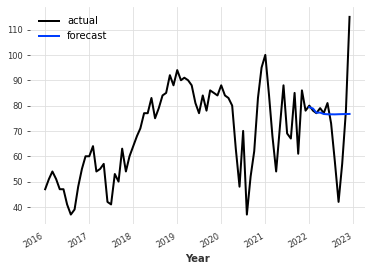

In [94]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [95]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.341547565003125
16.57024300055374
-0.00701972641642401
16.90865727369223


# Nizamabad

In [96]:
df_Ni.describe()

,AQI
count,84.00
mean,60.29
std,7.51
min,38.00
25%,57.00
50%,61.00
75%,64.00
max,81.00


<AxesSubplot:xlabel='Date'>

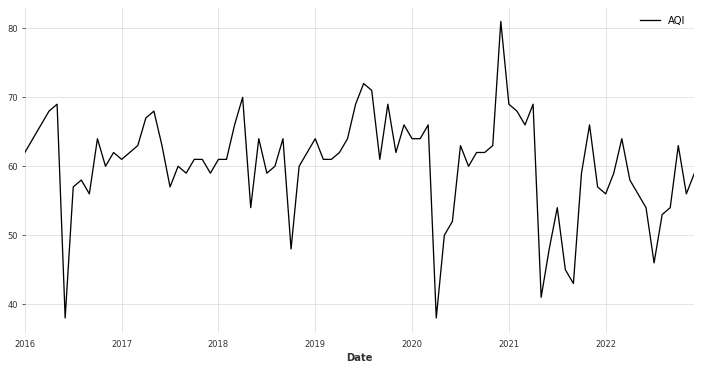

In [97]:
df_Ni.plot(x='Date', y='AQI', figsize=(12,6))

<Figure size 1728x576 with 0 Axes>

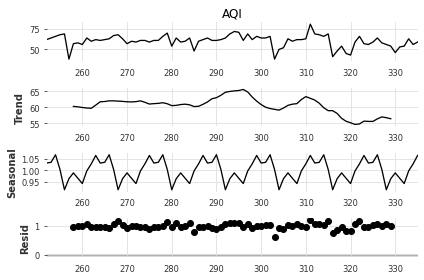

<Figure size 1728x576 with 0 Axes>

In [98]:
dec = sm.tsa.seasonal_decompose(df_Ni['AQI'],period = 12, model = 'multiplicative').plot()
plt.figure(figsize = (24,8))

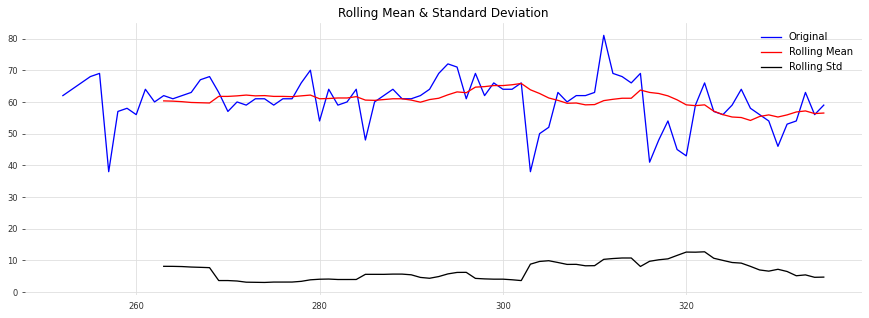

Results of Dickey-Fuller Test:
Test Statistic                -6.10
p-value                        0.00
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [99]:
test_stationarity(df_Ni['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


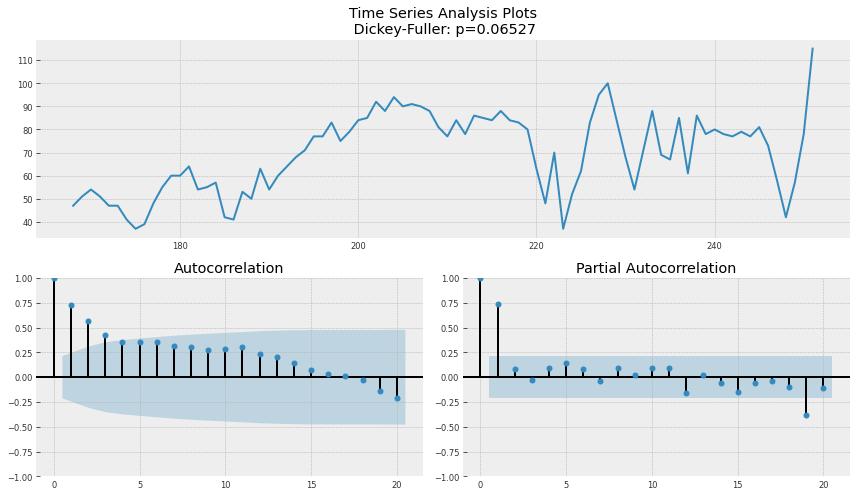

In [100]:
tsplot(df_Kh['AQI'])

In [101]:
series = TimeSeries.from_dataframe(df_Ni, 'Date',['AQI'])

In [102]:
train_Ni, test_Ni = series.split_after(pd.Timestamp('20211201'))
test = test_Ni

In [103]:
scaler.fit(train_Ni)
scaled_train = scaler.transform(train_Ni)
scaled_test = scaler.transform(test_Ni)

## ARIMA

In [104]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 0, 'Year')

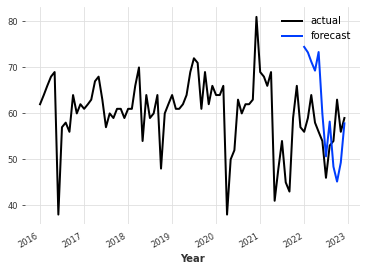

In [105]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [106]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

9.648000589115384
16.88232036444267
-5.049685645562797
11.204060743562042


## AutoARIMA

In [107]:
model = AutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

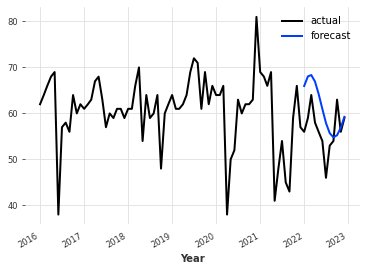

In [108]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [109]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

5.986257664419907
10.815868950704111
-1.4384674692071853
7.113241173055297


## Exponential Smoothening

In [110]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

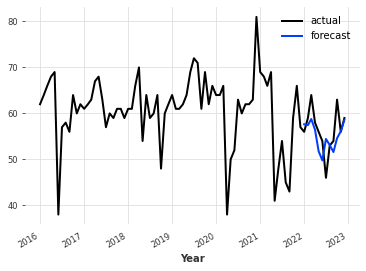

In [111]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [112]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

3.186063832987733
5.741683917760908
0.12440358976015431
4.262467068785024


## FFT

In [113]:
model = FFT()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

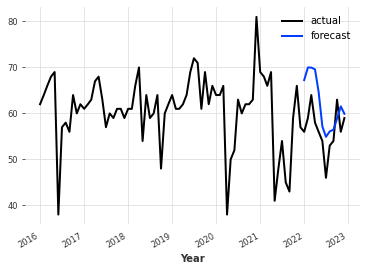

In [114]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [115]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

6.39082647166331
11.42832278970203
-1.5946549234456722
7.337512498217478


## Stats Forecast AutoARIMA

In [116]:
model = StatsForecastAutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

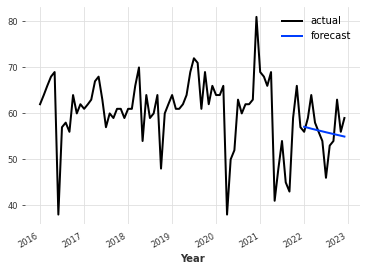

In [117]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [118]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

3.4246573180687814
6.161597225453909
-0.0013621831955770158
4.558318253622516


## Stats Forecast ETS

In [119]:
model = StatsForecastETS()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

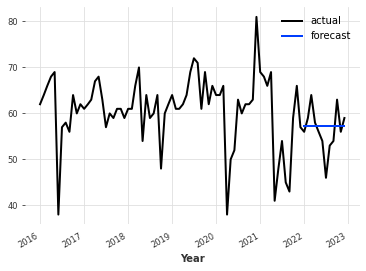

In [120]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [121]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

3.5509857640739946
6.531636841730077
-0.03130112373106009
4.625959178096959


## Prophet

In [122]:
model = Prophet()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/cgkap3md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/n3luhzn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23699', 'data', 'file=/tmp/tmp9y_s2b67/cgkap3md.json', 'init=/tmp/tmp9y_s2b67/n3luhzn5.json', 'output', 'file=/tmp/tmp9y_s2b67/prophet_model00xjo30p/prophet_model-20230303054814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

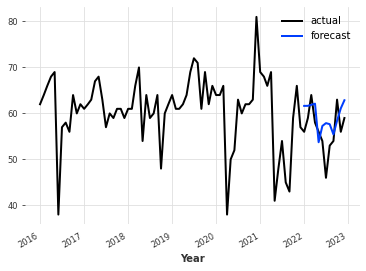

In [123]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [124]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

4.302120204316322
7.9461687055252765
-0.21848805770768998
5.028282728470484


## NBEATSModel

In [125]:
model = NBEATSModel(
    input_chunk_length = 4,
    output_chunk_length =1,
    generic_architecture = True,
    num_stacks = 4,
    num_blocks = 10,
    num_layers = 4,
    n_epochs = 5,
    batch_size = 4,
    model_name='nbeats_run',
)
model.fit(scaled_train, val_series = scaled_test, verbose=True)
pred = model.predict(n=12)
type(pred)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.0 M     Trainable params
1.3 K     Non-trainable params
8.1 M     Total params
64.402    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

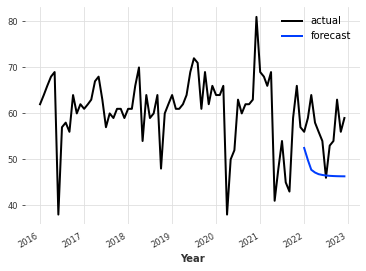

In [126]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [127]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

9.173869016566707
15.737383677599906
-4.024688109251948
10.21089017994895


# Warangal

In [128]:
df_W.describe()

,AQI
count,84.00
mean,73.70
std,14.06
min,38.00
25%,62.75
50%,74.50
75%,85.25
max,96.00


<AxesSubplot:xlabel='Date'>

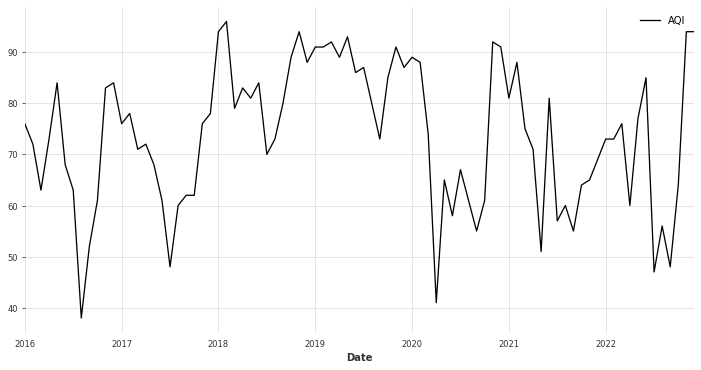

In [129]:
df_W.plot(x='Date', y='AQI', figsize=(12,6))

<Figure size 1728x576 with 0 Axes>

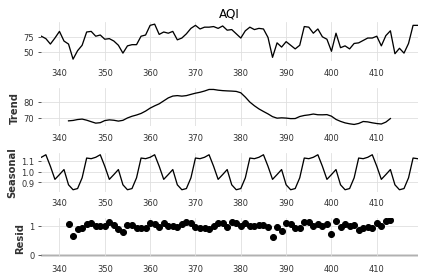

<Figure size 1728x576 with 0 Axes>

In [130]:
dec = sm.tsa.seasonal_decompose(df_W['AQI'],period = 12, model = 'multiplicative').plot()
plt.figure(figsize = (24,8))

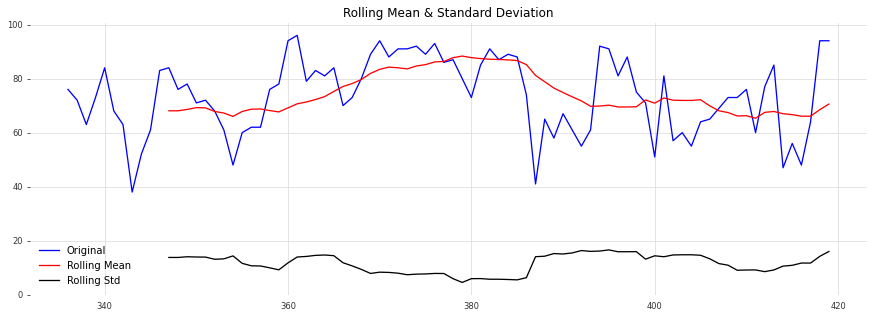

Results of Dickey-Fuller Test:
Test Statistic                -4.33
p-value                        0.00
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [131]:
test_stationarity(df_W['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


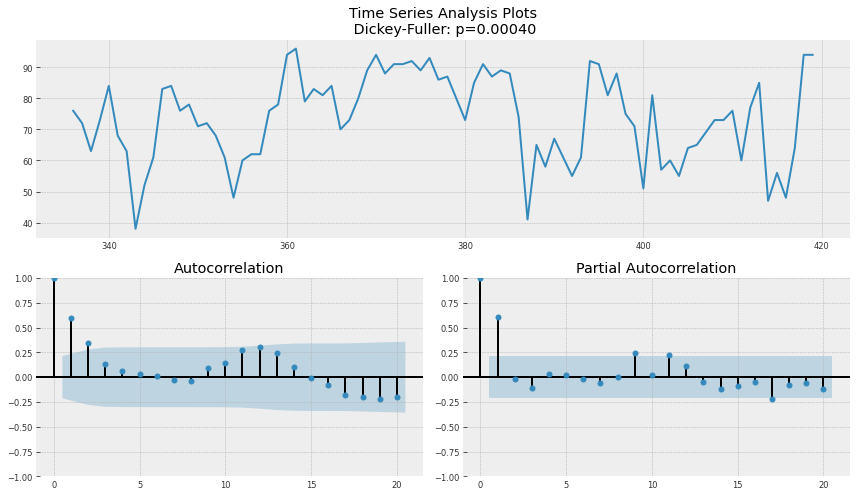

In [132]:
tsplot(df_W['AQI'])

In [133]:
series = TimeSeries.from_dataframe(df_W, 'Date',['AQI'])

In [134]:
train_W, test_W = series.split_after(pd.Timestamp('20211201'))
test = test_W

In [135]:
scaler.fit(train_W)
scaled_train = scaler.transform(train_W)
scaled_test = scaler.transform(test_W)

## ARIMA

In [136]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

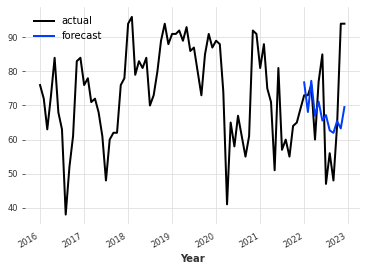

In [137]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [138]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

11.634000345515673
16.708323932306953
0.04598561185609884
14.97552193791292


## AutoARIMA

In [139]:
model = AutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

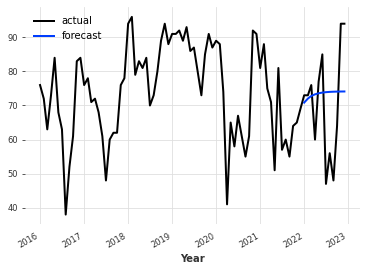

In [140]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [141]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

12.921053482347011
20.83204354590468
-0.045412949198875285
15.676476038809076


## Exponential Smoothening

In [142]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

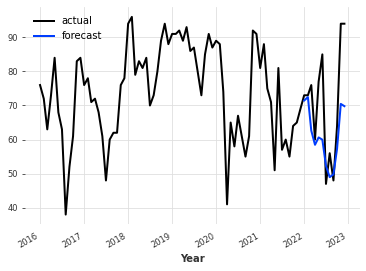

In [143]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [144]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.576681596927527
13.541585215928928
0.16951758707968756
13.972358665058602


## FFT

In [145]:
model = FFT()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

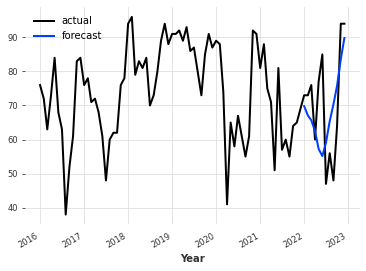

In [146]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [147]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

11.80876097117588
17.82877004406508
0.13653339822608368
14.247126400477134


## Stats Forecast AutoARIMA

In [148]:
model = StatsForecastAutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

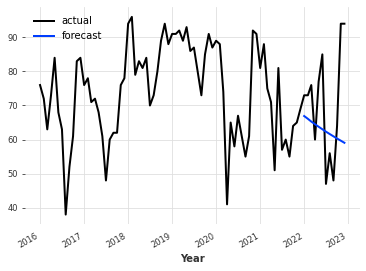

In [149]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [150]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

14.192266247215889
19.298350811191046
-0.32044383619540473
17.618319123668048


## Stats Forecast ETS

In [151]:
model = StatsForecastETS()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

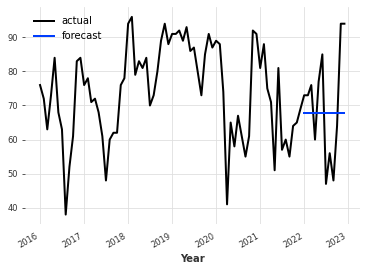

In [152]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [153]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

13.437971791416837
19.876606804601344
-0.031268179307037736
15.570061000764179


## Prophet

In [154]:
model = Prophet()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/o8atrb08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/c0h6hau7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83633', 'data', 'file=/tmp/tmp9y_s2b67/o8atrb08.json', 'init=/tmp/tmp9y_s2b67/c0h6hau7.json', 'output', 'file=/tmp/tmp9y_s2b67/prophet_modelv3kilzf0/prophet_model-20230303060445.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

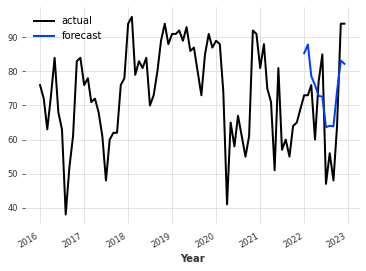

In [155]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [156]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

11.313339347356022
17.520036495891055
0.3757274076477052
12.114113533085403


## NBEATSModel

In [157]:
model = NBEATSModel(
    input_chunk_length = 4,
    output_chunk_length =1,
    generic_architecture = True,
    num_stacks = 4,
    num_blocks = 10,
    num_layers = 4,
    n_epochs = 10,
    batch_size = 4,
    model_name='nbeats_run',
)
model.fit(scaled_train, val_series = scaled_test, verbose=True)
pred = model.predict(n=12)
type(pred)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.0 M     Trainable params
1.3 K     Non-trainable params
8.1 M     Total params
64.402    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

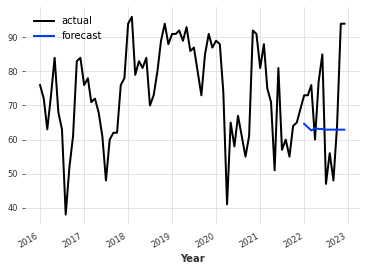

In [158]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [159]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

14.266773447799325
19.69240825409881
-0.23274535234881144
17.023199636076633


# Adilabad

In [160]:
df_Ad.describe()

,AQI
count,72.00
mean,67.53
std,8.05
min,40.00
25%,62.75
50%,67.00
75%,73.25
max,82.00


<AxesSubplot:xlabel='Date'>

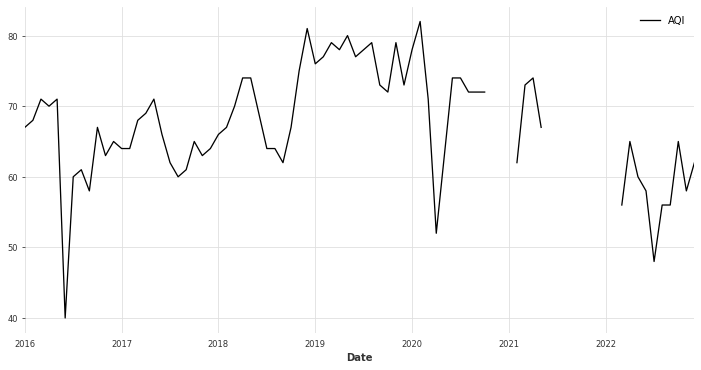

In [161]:
df_Ad.plot(x='Date', y='AQI', figsize=(12,6))

## Filling Missing Values using Interpolation

In [162]:
print(df_Ad.tail(30))

    Location       Date   AQI
54  Adilabad 2020-07-01 74.00
55  Adilabad 2020-08-01 72.00
56  Adilabad 2020-09-01 72.00
57  Adilabad 2020-10-01 72.00
58  Adilabad 2020-11-01   NaN
59  Adilabad 2020-12-01   NaN
60  Adilabad 2021-01-01   NaN
61  Adilabad 2021-02-01 62.00
62  Adilabad 2021-03-01 73.00
63  Adilabad 2021-04-01 74.00
64  Adilabad 2021-05-01 67.00
65  Adilabad 2021-06-01   NaN
66  Adilabad 2021-07-01   NaN
67  Adilabad 2021-08-01   NaN
68  Adilabad 2021-09-01   NaN
69  Adilabad 2021-10-01   NaN
70  Adilabad 2021-11-01   NaN
71  Adilabad 2021-12-01   NaN
72  Adilabad 2022-01-01   NaN
73  Adilabad 2022-02-01   NaN
74  Adilabad 2022-03-01 56.00
75  Adilabad 2022-04-01 65.00
76  Adilabad 2022-05-01 60.00
77  Adilabad 2022-06-01 58.00
78  Adilabad 2022-07-01 48.00
79  Adilabad 2022-08-01 56.00
80  Adilabad 2022-09-01 56.00
81  Adilabad 2022-10-01 65.00
82  Adilabad 2022-11-01 58.00
83  Adilabad 2022-12-01 62.00


In [163]:
# Filling Missing Values using Interpolation

df_Ad['Interpolated_Spline']= df_Ad['AQI'].interpolate(option='spline')

<ipython-input-163-d579f837e816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ad['Interpolated_Spline']= df_Ad['AQI'].interpolate(option='spline')


In [164]:
df_Ad['AQI']= df_Ad['AQI'].interpolate(option='spline')

<ipython-input-164-93b55ef2555f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ad['AQI']= df_Ad['AQI'].interpolate(option='spline')


In [165]:
print(df_Ad.tail(30))

    Location       Date   AQI  Interpolated_Spline
54  Adilabad 2020-07-01 74.00                74.00
55  Adilabad 2020-08-01 72.00                72.00
56  Adilabad 2020-09-01 72.00                72.00
57  Adilabad 2020-10-01 72.00                72.00
58  Adilabad 2020-11-01 69.50                69.50
59  Adilabad 2020-12-01 67.00                67.00
60  Adilabad 2021-01-01 64.50                64.50
61  Adilabad 2021-02-01 62.00                62.00
62  Adilabad 2021-03-01 73.00                73.00
63  Adilabad 2021-04-01 74.00                74.00
64  Adilabad 2021-05-01 67.00                67.00
65  Adilabad 2021-06-01 65.90                65.90
66  Adilabad 2021-07-01 64.80                64.80
67  Adilabad 2021-08-01 63.70                63.70
68  Adilabad 2021-09-01 62.60                62.60
69  Adilabad 2021-10-01 61.50                61.50
70  Adilabad 2021-11-01 60.40                60.40
71  Adilabad 2021-12-01 59.30                59.30
72  Adilabad 2022-01-01 58.20  

In [166]:
df_Ad['AQI'] = df_Ad['Interpolated_Spline']

<ipython-input-166-484b7a539516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ad['AQI'] = df_Ad['Interpolated_Spline']


In [168]:
df_Ad.drop(['Interpolated_Spline'], axis=1)

,Location,Date,AQI
0,Adilabad,2016-01-01,67.00
1,Adilabad,2016-02-01,68.00
2,Adilabad,2016-03-01,71.00
3,Adilabad,2016-04-01,70.00
4,Adilabad,2016-05-01,71.00
...,...,...,...
79,Adilabad,2022-08-01,56.00
80,Adilabad,2022-09-01,56.00
81,Adilabad,2022-10-01,65.00
82,Adilabad,2022-11-01,58.00


In [169]:
series = TimeSeries.from_dataframe(df_Ad, 'Date',['AQI'])

In [170]:
train_Ad, test_Ad = series.split_after(pd.Timestamp('20211201'))
test = test_Ad

In [171]:
scaler.fit(train_Ad)
scaled_train = scaler.transform(train_Ad)
scaled_test = scaler.transform(test_Ad)

## ARIMA

In [172]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

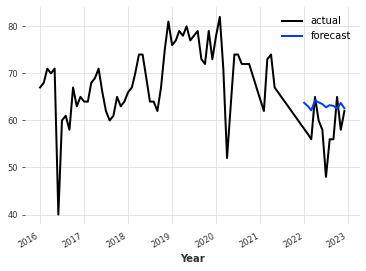

In [173]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [174]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

5.462680551098788
9.903305506616706
-1.2151842092975076
6.515142586354705


## AutoARIMA

In [175]:
model = AutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

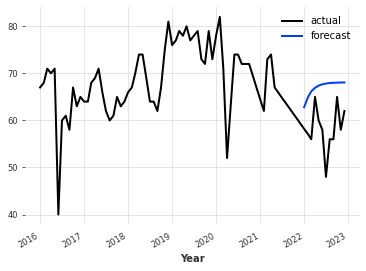

In [176]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [177]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

8.710882235361858
15.634416216328262
-4.0661737057052525
9.852785762260886


## Exponential Smoothening

In [178]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

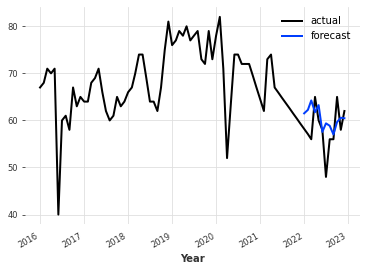

In [179]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [180]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

4.0286041824105014
7.196123356262139
-0.3174962402314383
5.024509754024247


## FFT

In [181]:
model = FFT()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

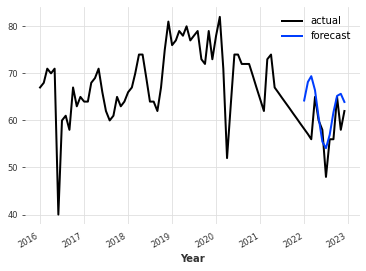

In [182]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [183]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

4.802898440594504
8.542768686369422
-1.0902073008523927
6.32868793850834


## Stats Forecast AutoARIMA

In [184]:
model = StatsForecastAutoARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

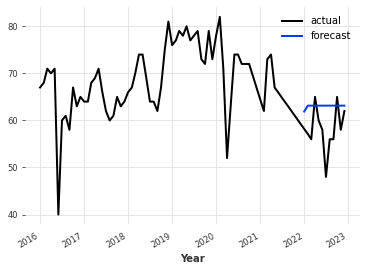

In [185]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [186]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

5.382712019351129
9.772498298106568
-1.189624835371541
6.47744682666597


## Stats Forecast ETS

In [187]:
model = StatsForecastETS()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

/usr/local/lib/python3.8/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

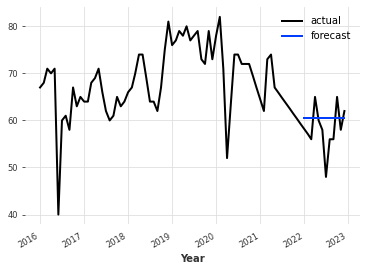

In [188]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [189]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

3.995445913389519
7.186517566830236
-0.26794172129105576
4.929111559973466


## Prophet

In [190]:
model = Prophet()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/t4vniz82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y_s2b67/zqcfs2fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85350', 'data', 'file=/tmp/tmp9y_s2b67/t4vniz82.json', 'init=/tmp/tmp9y_s2b67/zqcfs2fz.json', 'output', 'file=/tmp/tmp9y_s2b67/prophet_modelle22b75o/prophet_model-20230303060908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

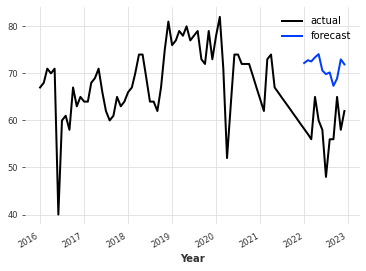

In [191]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [192]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

13.124639153880432
23.177023848236175
-8.952358947906259
13.809629180934268


## NBEATSModel

In [193]:
model = NBEATSModel(
    input_chunk_length = 4,
    output_chunk_length =1,
    generic_architecture = True,
    num_stacks = 4,
    num_blocks = 10,
    num_layers = 4,
    n_epochs = 10,
    batch_size = 4,
    model_name='nbeats_run',
)
model.fit(scaled_train, val_series = scaled_test, verbose=True)
pred = model.predict(n=12)
type(pred)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.0 M     Trainable params
1.3 K     Non-trainable params
8.1 M     Total params
64.402    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

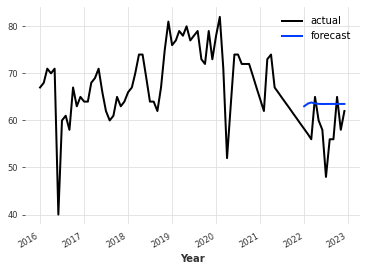

In [194]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [195]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

5.710503857090504
10.363479069168346
-1.4282401776715061
6.821263428025572


# Hyperparameter Optimization

# Karimnagar

In [200]:
df_Ka.describe()

,AQI
count,84.00
mean,86.02
std,22.59
min,31.00
25%,69.75
50%,90.50
75%,100.25
max,137.00


<AxesSubplot:xlabel='Date'>

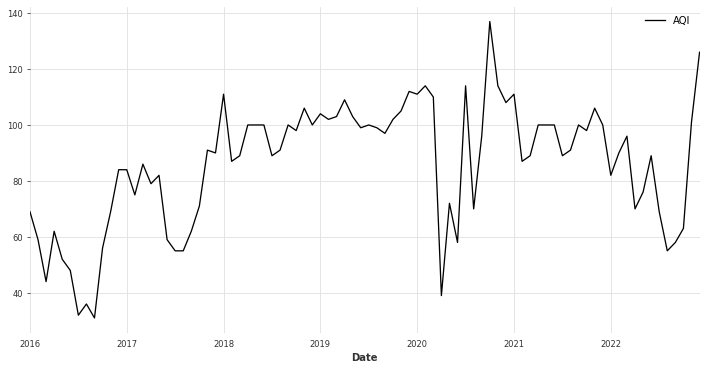

In [201]:
df_Ka.plot(x='Date', y='AQI', figsize=(12,6))

In [ ]:
series = TimeSeries.from_dataframe(df_Ka, 'Date',['AQI'])
train_Ka, test_Ka = series.split_after(pd.Timestamp('20211201'))
test = test_Ka
scaler.fit(train_Ka)
scaled_train = scaler.transform(train_Ka)
scaled_test = scaler.transform(test_Ka)

## ARIMA

In [ ]:
from darts.utils.utils import SeasonalityMode

parameters = {'p': [0, 1, 2, 4, 6, 8, 10],
              'd': [0, 1, 2, 3],
              'q': [0, 1, 2, 3]}

best_model, best_params, best_score = ARIMA.gridsearch(parameters=parameters, series=scaled_train, start=0.5, forecast_horizon=12)
print(best_model)
print(best_params)
print(best_score)


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum 

ARIMA(0, 0, 2)
{'p': 0, 'd': 0, 'q': 2}
51.83663165999791


In [ ]:
model = ARIMA (0, 0, 2)
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

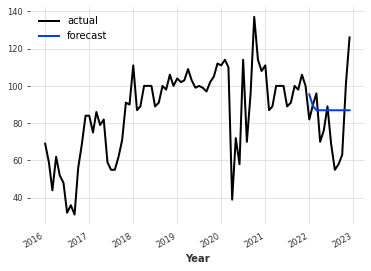

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

17.43127286791066
23.713310241560258
-0.11598249671405836
20.71517607026075


## Exponential Smoothening

In [ ]:
# grid search holt winter's exponential smoothing
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from numpy import array

# one-step Holt Winter’s Exponential Smoothing forecast
def exp_smoothing_forecast(history, config):
	t,d,s,p,b,r = config
	# define model
	history = array(history)
	model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
	# fit model
	model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = exp_smoothing_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
	models = list()
	# define config lists
	t_params = ['add', 'mul', None]
	d_params = [True, False]
	s_params = ['add', 'mul', None]
	p_params = seasonal
	b_params = [True, False]
	r_params = [True, False]
	# create config instances
	for t in t_params:
		for d in d_params:
			for s in s_params:
				for p in p_params:
					for b in b_params:
						for r in r_params:
							cfg = [t,d,s,p,b,r]
							models.append(cfg)
	return models


In [ ]:
cfg_list = exp_smoothing_configs(seasonal=[0,6,12])
scores = grid_search(series, cfg_list, 12)
for cfg, error in scores[:3]:
  print(cfg, error)

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

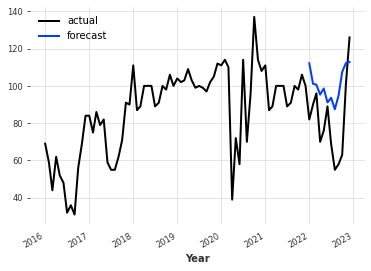

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

21.56343301811062
31.04915106092106
-0.6257045533032708
25.002345281792426


## FFT

In [ ]:
from darts.utils.utils import SeasonalityMode

parameters = {'trend' : ['exp','poly']}

best_model, best_params, best_score = FFT.gridsearch(parameters=parameters, series=scaled_train, start=0.5, forecast_horizon=12)
print(best_model)
print(best_params)
print(best_score)

/usr/local/lib/python3.8/dist-packages/darts/models/forecasting/fft.py:286: RuntimeWarning: divide by zero encountered in log
  range(len(series)), np.log(series.univariate_values()), 1
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/loca

FFT(nr_freqs_to_keep=10, trend=exp)
{'trend': 'exp'}
nan


In [ ]:
model = FFT(nr_freqs_to_keep=12, trend='poly')
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

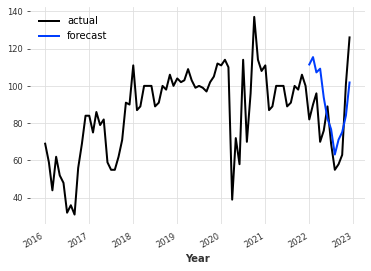

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

17.677645643002723
22.23969342726968
-0.05347414794385341
20.126667813189886
